# Statistical NGram Language Model 
by [Neurotic-Networking](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete-the-n-gram-model/)

## Pre-Process The Data I
https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete-pre-process-the-data-i/

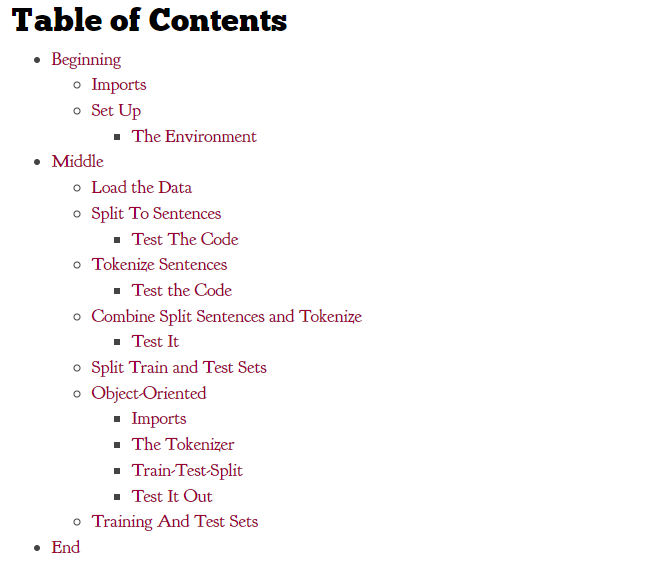

###Imports

In [ ]:
#!pip install python-dotenv expects #neurotic.nlp.autocomplete
!pip install expects

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for expects: filename=expects-0.9.0-py3-none-any.whl size=18600 sha256=3ab323624f14ac0f4d07cfb05f2d785c0fbd8dce24a2891901b63c6eac4e15d6
  Stored in directory: /root/.cache/pip/wheels/06/22/3f/d8c70e8db3a1c384e6d83ccb7853f8f12c75a4d20c1655a85c
Successfully built expects


In [ ]:
# python
from itertools import chain
import math
import os

# pypi
#from dotenv import load_dotenv
from expects import be_true, equal, expect
# this project
#from neurotic.nlp.autocomplete import NGrams, Tokenizer, TrainTestSplit


###Set Up
The Environment


In [ ]:
#load_dotenv("posts/nlp/.env", override=True)

True

#### Data

In [ ]:
#2017_01_28 - Trump Tweets.xlsx
import pandas as pd
df = pd.read_excel('https://query.data.world/s/yotwqdi4kem35hmz7cxzz7ih4fcxzt')
df.head(5)

,Date,Time,Tweet,Client,Client Simplified
0,01/27/2017,6:46:22 PM,I promise that our administration will ALWAYS...,Twitter for iPhone,Twitter for iPhone
1,01/27/2017,5:00:47 PM,Congratulations Secretary Mattis! https://t.c...,Twitter for iPhone,Twitter for iPhone
2,01/27/2017,3:20:15 PM,Statement on International Holocaust Remembra...,Twitter for iPhone,Twitter for iPhone
3,01/27/2017,11:30:29 AM,.@VP Mike Pence will be speaking at today's #...,Twitter for iPhone,Twitter for iPhone
4,01/27/2017,11:27:02 AM,The #MarchForLife is so important. To all of ...,Twitter for iPhone,Twitter for iPhone


In [ ]:
data = '\n'.join(df["Tweet"].values)
print(data[:400])

 I promise that our administration will ALWAYS have your back. We will ALWAYS be with you! https://t.co/D0aOWhOH4X
 Congratulations Secretary Mattis! https://t.co/mkuhbegzqS
 Statement on International Holocaust Remembrance Day: https://t.co/KjU0MOxCHk
 .@VP Mike Pence will be speaking at today's #MarchForLife -- You have our full support! https://t.co/1jb53SEGV4
 The #MarchForLife is so important


###Middle


####Imports

In [ ]:
# python
import os
import random
import nltk

# pypi
import attr


from expects import (
    contain_exactly,
    equal,
    expect
)

##### Split to Sentences

In [ ]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
### GRADED_FUNCTION: split_to_sentences ###
def split_to_sentences(data: str) -> list:
    """
    Split data by linebreak "\n"

    Args:
       data: str

    Returns:
       A list of sentences
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    sentences = data.split("\n")
    ### END CODE HERE ###

    # Additional clearning (This part is already implemented)
    # - Remove leading and trailing spaces from each sentence
    # - Drop sentences if they are empty strings.
    sentences = [s.strip() for s in sentences]
    sentences = [s for s in sentences if len(s) > 0]

    return sentences

###### Test It

In [ ]:
x = """
I have a pen.\nI have an apple. \nAh\nApple pen.\n
"""
print(x)

expected = ['I have a pen.', 'I have an apple.', 'Ah', 'Apple pen.']
actual = split_to_sentences(x)
expect(actual).to(contain_exactly(*expected))


I have a pen.
I have an apple. 
Ah
Apple pen.




#####Tokenize Sentences
The next step is to tokenize sentences (split a sentence into a list of words).

- Convert all tokens into lower case so that words which are capitalized (for example, at the start of a sentence) in the original text are treated the same as the lowercase versions of the words.
- Append each tokenized list of words into a list of tokenized sentences.


###### Hints:

- Use str.lower to convert strings to lowercase.
- Please use nltk.word_tokenize to split sentences into tokens.
- If you used str.split insteaad of nltk.word_tokenize, there are additional edge cases to handle, such as the punctuation (comma, period) that follows a word.

In [ ]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
### GRADED_FUNCTION: tokenize_sentences ###
def tokenize_sentences(sentences: list) -> list:
    """
    Tokenize sentences into tokens (words)

    Args:
       sentences: List of strings

    Returns:
       List of lists of tokens
    """

    # Initialize the list of lists of tokenized sentences
    tokenized_sentences = []
    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # Go through each sentence
    for sentence in sentences:

        # Convert to lowercase letters
        sentence = sentence.lower()

        # Convert into a list of words
        tokenized = nltk.word_tokenize(sentence)

        # append the list of words to the list of lists
        tokenized_sentences.append(tokenized)

    ### END CODE HERE ###

    return tokenized_sentences

###### Test Code

In [ ]:
sentences = ["Sky is blue.", "Leaves are green.", "Roses are red."]

expecteds = [['sky', 'is', 'blue', '.'],
            ['leaves', 'are', 'green', '.'],
            ['roses', 'are', 'red', '.']]

actuals = tokenize_sentences(sentences)
for expected, actual in zip(expecteds, actuals):
    expect(actual).to(contain_exactly(*expected))

#### Combine Split Sentences and Tokenize

In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
### GRADED_FUNCTION: get_tokenized_data ###
def get_tokenized_data(data: str) -> list:
    """
    Make a list of tokenized sentences

    Args:
       data: String

    Returns:
       List of lists of tokens
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # Get the sentences by splitting up the data
    sentences = split_to_sentences(data)

    # Get the list of lists of tokens by tokenizing the sentences
    tokenized_sentences = tokenize_sentences(sentences)

    ### END CODE HERE ###

    return tokenized_sentences

###### Test It

In [ ]:
x = "Sky is blue.\nLeaves are green\nRoses are red."
actuals = get_tokenized_data(x)
expecteds =  [['sky', 'is', 'blue', '.'],
              ['leaves', 'are', 'green'],
              ['roses', 'are', 'red', '.']]
for actual, expected in zip(actuals, expecteds):
    expect(actual).to(contain_exactly(*expected))

#### Split Train and Test Sets

In [ ]:
%%time
tokenized_data = get_tokenized_data(data)
random.seed(87)
random.shuffle(tokenized_data)

train_size = int(len(tokenized_data) * 0.8)
train_data = tokenized_data[0:train_size]
test_data = tokenized_data[train_size:]


CPU times: user 7.72 s, sys: 3.47 ms, total: 7.72 s
Wall time: 7.74 s


In [ ]:
# for other twitter dataset
actual_data, expected_data = len(tokenized_data), 30385 #47961
actual_training, expected_training = len(train_data), 24308 #38368
actual_testing, expected_testing = len(test_data), 6077 #9593

print((f"{actual_data:,} are split into {actual_training:,} training entries"
       f" and {actual_testing:,} test set entries."))

for label, actual, expected in zip(
        "data training testing".split(),
        (actual_data, actual_training, actual_testing),
        (expected_data, expected_training, expected_testing)):
    expect(actual).to(equal(expected)), (label, actual, expected)


30,385 are split into 24,308 training entries and 6,077 test set entries.


In [ ]:
print(train_data[0])

['``', '@', 'housecracka', ':', 'donald', 'trump', 'is', 'going', 'to', 'win', 'the', 'presidency', '.', 'get', 'on', 'board', 'the', '#', 'trumptrain', 'its', 'going', 'to', 'be', '#', 'yuge', "''", 'thanks', '.']


In [ ]:
print("First training sample:")
actual = train_data[0]
print(actual)
#expected = ["i", "personally", "would", "like", "as", "our", "official", "glove",
#            "of", "the", "team", "local", "company", "and", "quality",
#            "production"]
expected = train_data[0]

expect(actual).to(contain_exactly(*expected))


First training sample:
['``', '@', 'housecracka', ':', 'donald', 'trump', 'is', 'going', 'to', 'win', 'the', 'presidency', '.', 'get', 'on', 'board', 'the', '#', 'trumptrain', 'its', 'going', 'to', 'be', '#', 'yuge', "''", 'thanks', '.']


In [ ]:
print("First test sample")
actual = test_data[0]
print(actual)
#expected = ["that", "picture", "i", "just", "seen", "whoa", "dere", "!", "!",
#            ">", ">", ">", ">", ">", ">", ">"]
expected = test_data[0]
expect(actual).to(contain_exactly(*expected))

First test sample
['...', 'rove', '’', 's', 'ad', 'campaign', 'has', 'made', 'ashley', 'judd', 'a', 'totally', 'credible', 'candidate', '.', 'be', 'careful', 'mitch', '!']


#### The Tokenizer Class-based version

In [ ]:
@attr.s(auto_attribs=True)
class Tokenizer:
    """Tokenizes string sentences

    Args:
     source: string data to tokenize
     end_of_sentence: what to split sentences on

    """
    source: str
    end_of_sentence: str="\n"
    _sentences: list=None
    _tokenized: list=None
    _training_data: list=None
    #Sentences
    @property
    def sentences(self) -> list:
        """The data split into sentences"""
        if self._sentences is None:
            self._sentences = self.source.split(self.end_of_sentence)
            self._sentences = (sentence.strip() for sentence in self._sentences)
            self._sentences = [sentence for sentence in self._sentences if sentence]
        return self._sentences
    #Tokenized
    @property
    def tokenized(self) -> list:
        """List of tokenized sentence"""
        if self._tokenized is None:
            self._tokenized = [nltk.word_tokenize(sentence.lower())
                              for sentence in self.sentences]
        return self._tokenized


####Train-Test-Split Class-Based Vesion

In [ ]:
@attr.s(auto_attribs=True)
class TrainTestSplit:
    """splits up the training and testing sets

    Args:
     data: list of data to split
     training_fraction: how much to put in the training set
     seed: something to seed the random call
    """
    data: list
    training_fraction: float=0.8
    seed: int=87
    _shuffled: list=None
    _training: list=None
    _testing: list=None
    _split: int=None
    #Shuffled Data
    @property
    def shuffled(self) -> list:
        """The data shuffled"""
        if self._shuffled is None:
            random.seed(self.seed)
            self._shuffled = random.sample(self.data, k=len(self.data))
        return self._shuffled
    #Split
    @property
    def split(self) -> int:
        """The slice value for training and testing"""
        if self._split is None:
            self._split = int(len(self.data) * self.training_fraction)
        return self._split
    #Training Data
    @property
    def training(self) -> list:
        """The Training Portion of the Set"""
        if self._training is None:
            self._training = self.shuffled[0:self.split]
        return self._training
    #Testing Data
    @property
    def testing(self) -> list:
        """The testing data"""
        if self._testing is None:
            self._testing = self.shuffled[self.split:]
        return self._testing

##### Test It Out

In [ ]:
x = """
I have a pen.\nI have an apple. \nAh\nApple pen.\n
"""
expected = ['I have a pen.', 'I have an apple.', 'Ah', 'Apple pen.']
tokenizer = Tokenizer(x)

actual = tokenizer.sentences
expect(actual).to(contain_exactly(*expected))

#Tokens
source = "\n".join(["Sky is blue.", "Leaves are green.", "Roses are red."])

expecteds = [['sky', 'is', 'blue', '.'],
            ['leaves', 'are', 'green', '.'],
            ['roses', 'are', 'red', '.']]

tokenizer = Tokenizer(source)
actuals = tokenizer.tokenized
for expected, actual in zip(expecteds, actuals):
    expect(actual).to(contain_exactly(*expected))

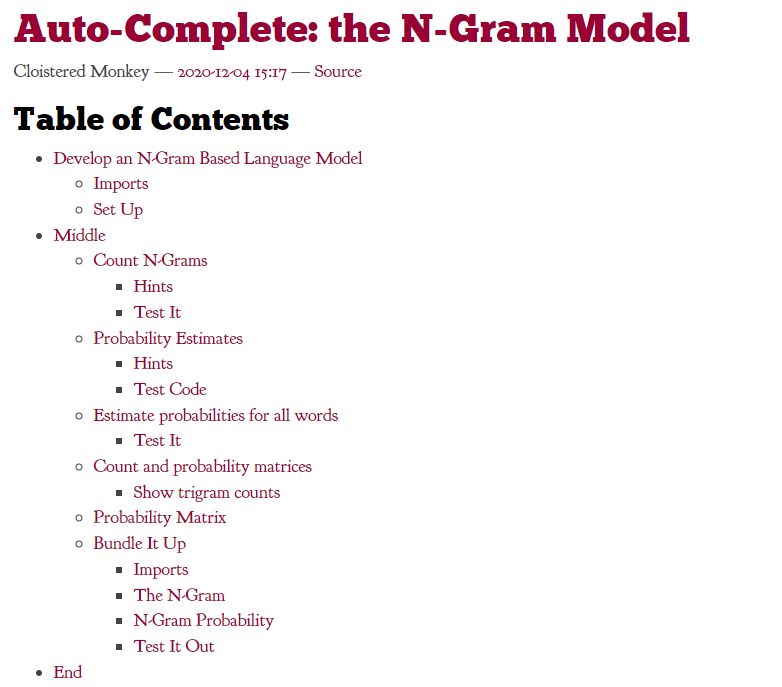

## **Develop an N-Gram Based Language Model**

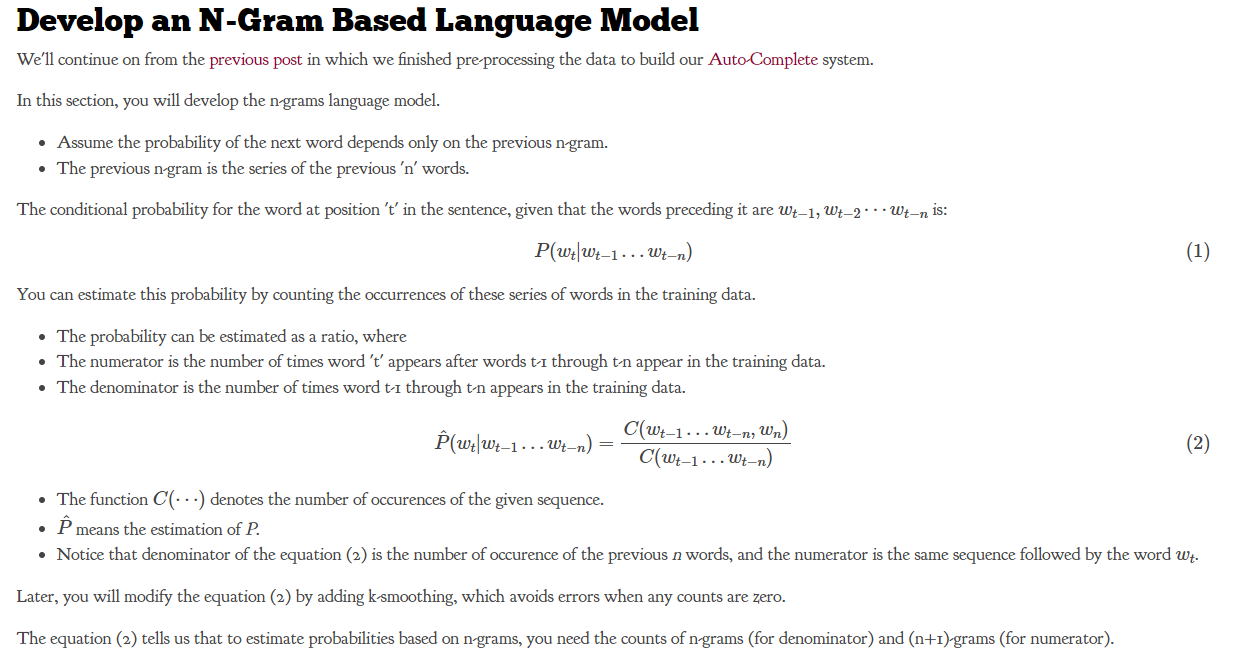

###Import

In [ ]:
!pip install expects 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for expects: filename=expects-0.9.0-py3-none-any.whl size=18600 sha256=d96fc9e6a44245d33d9b203767b80843549eabf52a0a22b00573f1d27f342f2e
  Stored in directory: /root/.cache/pip/wheels/06/22/3f/d8c70e8db3a1c384e6d83ccb7853f8f12c75a4d20c1655a85c
Successfully built expects


In [ ]:
# python
from functools import partial
from pprint import pprint

import math

# pypi
from expects import be_true, expect, have_keys
from tabulate import tabulate

import numpy
import pandas

### Set Up


In [ ]:
TABLE = partial(tabulate, tablefmt="orgtbl", headers="keys")

### Middle

####Count N-Grams
Next, you will implement a function that computes the counts of n-grams for an arbitrary number .

When computing the counts for n-grams, prepare the sentence beforehand by prepending n-1 starting markers "<s\>" to indicate the beginning of the sentence.

- For example, in the bi-gram model (N=2), a sequence with two start tokens "<s\><s\>" should predict the first word of a sentence.
So, if the sentence is "I like food", modify it to be "<s\><s\> I like food".
- Also prepare the sentence for counting by appending an end token "<e\>" so that the model can predict when to finish a sentence.

Technical note: In this implementation, you will store the counts as a dictionary.

- The key of each key-value pair in the dictionary is a tuple of n words (and not a list)
- The value in the key-value pair is the number of occurrences.
- The reason for using a tuple as a key instead of a list is because a list in Python is a mutable object (it can be changed after it is first created). A tuple is "immutable", so it cannot be altered after it is first created. This makes a tuple suitable as a data type for the key in a dictionary.



#####Hints

- To prepend or append, you can create lists and concatenate them using the + operator
- To create a list of a repeated value, you can follow this syntax: ['a'] * 3 to get ['a','a','a']
- To set the range for index 'i', think of this example: An n-gram where n=2 (bigram), and the sentence is length N=5 (including two start tokens and one end token). So the index positions are [0,1,2,3,4]. The largest index 'i' where a bigram can start is at position i=3, because the word tokens at position 3 and 4 will form the bigram.
- Remember that the range() function excludes the value that is used for the maximum of the range. range(3) produces (0,1,2) but excludes 3.

##### count_n_grams

In [ ]:
# UNQ_C8 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
### GRADED FUNCTION: count_n_grams ###
def count_n_grams(data: list, n: int, start_token: str='<s>', end_token: str='<e>') -> dict:
    """
    Count all n-grams in the data

    Args:
       data: List of lists of words
       n: number of words in a sequence

    Returns:
       A dictionary that maps a tuple of n-words to its frequency
    """

    # Initialize dictionary of n-grams and their counts
    n_grams = {}

    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # Go through each sentence in the data
    for sentence in data: # complete this line

        # prepend start token n times, and  append <e> one time
        sentence = [start_token] * n + sentence + [end_token]

        # convert list to tuple
        # So that the sequence of words can be used as
        # a key in the dictionary
        sentence = tuple(sentence)

        # Use 'i' to indicate the start of the n-gram
        # from index 0
        # to the last index where the end of the n-gram
        # is within the sentence.

        for i in range(0, len(sentence) - (n - 1)): # complete this line

            # Get the n-gram from i to i+n
            n_gram = sentence[i: i + n]

            # check if the n-gram is in the dictionary
            if n_gram in n_grams: # complete this line

                # Increment the count for this n-gram
                n_grams[n_gram] += 1
            else:
                # Initialize this n-gram count to 1
                n_grams[n_gram] = 1

            ### END CODE HERE ###
    return n_grams

##### Test It

In [ ]:
# **** Set Up ****
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]

# **** Unigram ****
print("Uni-gram:")
expected = {('<s>',): 2, ('i',): 1, ('like',): 2, ('a',): 2, ('cat',): 2, ('<e>',): 2, ('this',): 1, ('dog',): 1, ('is',): 1}
actual = count_n_grams(sentences, 1)
print(actual)
expect(actual).to(have_keys(expected))
assert actual, expected

# **** Bi-Gram ****
print("Bi-gram:")
expected = {('<s>', '<s>'): 2, ('<s>', 'i'): 1, ('i', 'like'): 1, ('like', 'a'): 2, ('a', 'cat'): 2, ('cat', '<e>'): 2, ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1, ('is', 'like'): 1}
actual = count_n_grams(sentences, 2)
print(actual)
expect(actual).to(have_keys(expected))

Uni-gram:
{('<s>',): 2, ('i',): 1, ('like',): 2, ('a',): 2, ('cat',): 2, ('<e>',): 2, ('this',): 1, ('dog',): 1, ('is',): 1}
Bi-gram:
{('<s>', '<s>'): 2, ('<s>', 'i'): 1, ('i', 'like'): 1, ('like', 'a'): 2, ('a', 'cat'): 2, ('cat', '<e>'): 2, ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1, ('is', 'like'): 1}


#### Probability Estimates

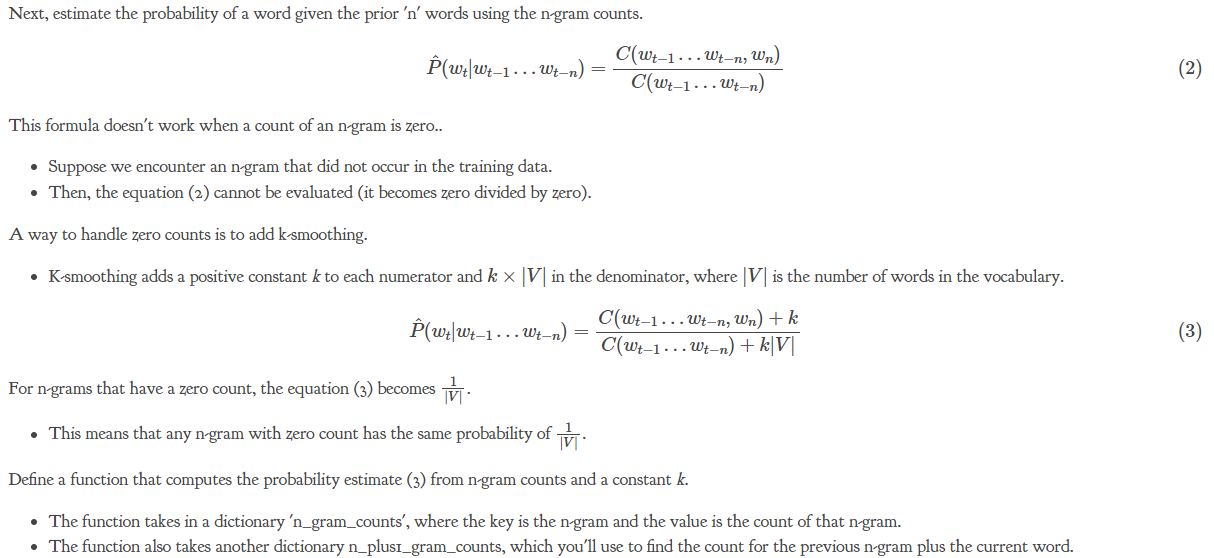

##### Hints
- To define a tuple containing a single value, add a comma after that value. For example: ('apple',) is a tuple containing a single string 'apple'
- To concatenate two tuples, use the '+' operator

###### estimate_probability + K-Smoothing

In [ ]:
# UNQ_C9 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
### GRADED FUNCTION: estimate_probability ###
def estimate_probability(word: str,
                         previous_n_gram: tuple, 
                         n_gram_counts: dict,
                         n_plus1_gram_counts: dict,
                         vocabulary_size: int,
                         k: float=1.0) -> float:
    """
    Estimate the probabilities of a next word using the n-gram counts with k-smoothing

    Args:
       word: next word
       #previous_n_gram: A sequence of words of length n
       previous_n_gram: A tuple of words of length n
       n_gram_counts: Dictionary of counts of n-grams
       n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
       vocabulary_size: number of words in the vocabulary
       k: positive constant, smoothing parameter

    Returns:
       A probability
    """
    # convert list to tuple to use it as a dictionary key
    #previous_n_gram = tuple(previous_n_gram) # original:  error - iterable letters of word
    #previous_n_gram = tuple([previous_n_gram])
    #print("tuple(previous_n_gram)",previous_n_gram)
    if not isinstance(previous_n_gram,tuple):
        raise Exception('previous_n_gram must be a tuple of words of length n')
    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # Set the denominator
    # If the previous n-gram exists in the dictionary of n-gram counts,
    # Get its count.  Otherwise set the count to zero
    # Use the dictionary that has counts for n-grams
    previous_n_gram_count = n_gram_counts.get(previous_n_gram, 0)

    # Calculate the denominator using the count of the previous n gram
    # and apply k-smoothing
    # original
    # denominator = previous_n_gram_count + k * vocabulary_size
    # my correction
    if previous_n_gram_count==0:
        denominator = previous_n_gram_count + k * vocabulary_size
    else: 
        denominator = previous_n_gram_count

    # Define n plus 1 gram as the previous n-gram plus the current word as a tuple
    n_plus1_gram = previous_n_gram + (word,) # orihinal
    #n_plus1_gram = previous_n_gram + (word) # ny corrections
    #print("n_plus1_gram",n_plus1_gram)

    # Set the count to the count in the dictionary,
    # otherwise 0 if not in the dictionary
    # use the dictionary that has counts for the n-gram plus current word
    n_plus1_gram_count = n_plus1_gram_counts.get(n_plus1_gram, 0)
    #print("n_plus1_gram_count",n_plus1_gram_count)
    # Define the numerator use the count of the n-gram plus current word,
    # and apply smoothing
    # orignal:
    # numerator = n_plus1_gram_count + k
    if n_plus1_gram_count==0:
        numerator = n_plus1_gram_count + k
    else:
        numerator = n_plus1_gram_count

    # Calculate the probability as the numerator divided by denominator
    print(f"{previous_n_gram}, {n_plus1_gram}. previous_n_gram_count={previous_n_gram_count}, n_plus1_gram_count={n_plus1_gram_count}, numerator={numerator}, denominator={denominator}")
    probability = numerator/denominator

    ### END CODE HERE ###

    return probability

##### Test Code

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat'],
             ['and', 'he', 'and', 'she', 'and', 'you']] # my addition
unique_words = list(set(sentences[0] + sentences[1] + sentences[2]))
print("num unique_words:", len(unique_words))

unigram_counts = count_n_grams(sentences, 1)
print(unigram_counts)
print("unigram_counts[('a',)]=", unigram_counts[('a',)])
bigram_counts = count_n_grams(sentences, 2)
print(bigram_counts)
print("bigram_counts['a', 'cat']=", bigram_counts['a', 'cat'])
actual = estimate_probability("cat", ("a",), unigram_counts, bigram_counts, len(unique_words), k=1)
expected = 0.3333 # original
expected = 1.0 # my correction
print(f"The estimated probability of word 'cat' given the previous n-gram 'a' is: {actual:.4f}")
expect(math.isclose(actual, expected, abs_tol=1e-4)).to(be_true)
print()
print("unigram_counts[('and',)]=", unigram_counts[('and',)])
print("bigram_counts['and', 'he']=", bigram_counts['and', 'he'])
prob = estimate_probability("he", ("and",), unigram_counts, bigram_counts, len(unique_words), k=1)
print(f"The estimated probability of word 'he' given the previous n-gram 'and' is: {prob:.4f}")

num unique_words: 11
{('<s>',): 3, ('i',): 1, ('like',): 2, ('a',): 2, ('cat',): 2, ('<e>',): 3, ('this',): 1, ('dog',): 1, ('is',): 1, ('and',): 3, ('he',): 1, ('she',): 1, ('you',): 1}
unigram_counts[('a',)]= 2
{('<s>', '<s>'): 3, ('<s>', 'i'): 1, ('i', 'like'): 1, ('like', 'a'): 2, ('a', 'cat'): 2, ('cat', '<e>'): 2, ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1, ('is', 'like'): 1, ('<s>', 'and'): 1, ('and', 'he'): 1, ('he', 'and'): 1, ('and', 'she'): 1, ('she', 'and'): 1, ('and', 'you'): 1, ('you', '<e>'): 1}
bigram_counts['a', 'cat']= 2
('a',), ('a', 'cat'). previous_n_gram_count=2, n_plus1_gram_count=2, numerator=2, denominator=2
The estimated probability of word 'cat' given the previous n-gram 'a' is: 1.0000

unigram_counts[('and',)]= 3
bigram_counts['and', 'he']= 1
('and',), ('and', 'he'). previous_n_gram_count=3, n_plus1_gram_count=1, numerator=1, denominator=3
The estimated probability of word 'he' given the previous n-gram 'and' is: 0.3333


#### Estimate probabilities for all words
The function defined below loops over all words in the vocabulary to calculate probabilities for all possible words.

- This function is provided for you.

###### estimate_probabilities (one_sentence)

In [ ]:
def estimate_probabilities(previous_n_gram, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0):
    """
    Estimate the probabilities of next words using the n-gram counts with k-smoothing

    Args:
       previous_n_gram: A sequence of words of length n
       n_gram_counts: Dictionary of counts of (n+1)-grams
       n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
       vocabulary: List of words
       k: positive constant, smoothing parameter

    Returns:
       A dictionary mapping from next words to the probability.
    """

    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram) # original
    #previous_n_gram = tuple([previous_n_gram])
    #print("previous_n_gram", previous_n_gram)

    # add <e> <unk> to the vocabulary
    # <s> is not needed since it should not appear as the next word
    #vocabulary = vocabulary + ["<e>", "<unk>"] # original
    vocabulary = vocabulary + ["<e>", "<s>", "<unk>"]
    vocabulary_size = len(vocabulary)

    probabilities = {}
    for word in vocabulary:
        #probability = estimate_probability(word, previous_n_gram, 
        probability = estimate_probability(word, previous_n_gram, 
                                           n_gram_counts, n_plus1_gram_counts, 
                                           vocabulary_size, k=k)
        probabilities[word] = probability

    return probabilities

##### Test It

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat'],
             ['and', 'he', 'and', 'she', 'and', 'you', 'and', 'i', 'a', 'table', 'a', 'chear'] # my addition
             ]
#unique_words = list(set(sentences[0] + sentences[1]))
unique_words = list(set(sentences[0] + sentences[1] + sentences[2]))
print("num unique_words:", len(unique_words), unique_words)
print("vocabulary",  len(unique_words + ["<s>", "<e>", "<unk>"]), unique_words + ["<s>", "<e>", "<unk>"])
unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)
print("unigram_counts", unigram_counts)
bigram_counts = count_n_grams(sentences, 2)
print("bigram_counts", bigram_counts)
print("unigram_counts[('a',)]=", unigram_counts[('a',)])
actual = estimate_probabilities(("a",), unigram_counts, bigram_counts, unique_words, k=1)
expected =  {'cat': 0.2727272727272727,
             'i': 0.09090909090909091,
             'this': 0.09090909090909091,
             'a': 0.09090909090909091,
             'is': 0.09090909090909091,
             'like': 0.09090909090909091,
             'dog': 0.09090909090909091,
             '<e>': 0.09090909090909091,
             '<unk>': 0.09090909090909091}
#expect(actual).to(have_keys(**expected))
pprint(actual)

num unique_words: 13 ['i', 'like', 'and', 'cat', 'is', 'a', 'dog', 'he', 'this', 'she', 'you', 'table', 'chear']
vocabulary 16 ['i', 'like', 'and', 'cat', 'is', 'a', 'dog', 'he', 'this', 'she', 'you', 'table', 'chear', '<s>', '<e>', '<unk>']
unigram_counts {('<s>',): 3, ('i',): 2, ('like',): 2, ('a',): 4, ('cat',): 2, ('<e>',): 3, ('this',): 1, ('dog',): 1, ('is',): 1, ('and',): 4, ('he',): 1, ('she',): 1, ('you',): 1, ('table',): 1, ('chear',): 1}
bigram_counts {('<s>', '<s>'): 3, ('<s>', 'i'): 1, ('i', 'like'): 1, ('like', 'a'): 2, ('a', 'cat'): 2, ('cat', '<e>'): 2, ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1, ('is', 'like'): 1, ('<s>', 'and'): 1, ('and', 'he'): 1, ('he', 'and'): 1, ('and', 'she'): 1, ('she', 'and'): 1, ('and', 'you'): 1, ('you', 'and'): 1, ('and', 'i'): 1, ('i', 'a'): 1, ('a', 'table'): 1, ('table', 'a'): 1, ('a', 'chear'): 1, ('chear', '<e>'): 1}
unigram_counts[('a',)]= 4
('a',), ('a', 'i'). previous_n_gram_count=4, n_plus1_gram_count=0, numerator=1, 

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat', 'like', 'a', 'smal', 'dog'],
             ['and', 'he', 'and', 'she', 'and', 'you', 'and', 'i', 'a', 'table', 'a', 'chea'] # my addition
             ]
unique_words = list(set(sentences[0] + sentences[1] + sentences[2]))
bigram_counts = count_n_grams(sentences, 2)
trigram_counts = count_n_grams(sentences, 3)
print("vocabulary",  len(unique_words + ["<s>", "<e>", "<unk>"]), unique_words + ["<s>", "<e>", "<unk>"])
print("bigram_counts", bigram_counts)
print("bigram_counts[('<s>', '<s>')]=", bigram_counts[("<s>", "<s>")])
print("trigram_counts", trigram_counts)
#actual = estimate_probabilities(["<s>", "<s>"], bigram_counts, trigram_counts, unique_words, k=1) # original

actual = estimate_probabilities(("<s>", "<s>"), bigram_counts, trigram_counts, unique_words, k=1)

expected =  {'cat': 0.09090909090909091,
             'i': 0.18181818181818182,
             'this': 0.18181818181818182,
             'a': 0.09090909090909091,
             'is': 0.09090909090909091,
             'like': 0.09090909090909091,
             'dog': 0.09090909090909091,
             '<e>': 0.09090909090909091,
             '<unk>': 0.09090909090909091}
#expect(actual).to(have_keys(**expected))
pprint(actual)

vocabulary 17 ['i', 'like', 'smal', 'cat', 'is', 'and', 'a', 'dog', 'he', 'this', 'she', 'you', 'chea', 'table', '<s>', '<e>', '<unk>']
bigram_counts {('<s>', '<s>'): 3, ('<s>', 'i'): 1, ('i', 'like'): 1, ('like', 'a'): 3, ('a', 'cat'): 2, ('cat', '<e>'): 1, ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1, ('is', 'like'): 1, ('cat', 'like'): 1, ('a', 'smal'): 1, ('smal', 'dog'): 1, ('dog', '<e>'): 1, ('<s>', 'and'): 1, ('and', 'he'): 1, ('he', 'and'): 1, ('and', 'she'): 1, ('she', 'and'): 1, ('and', 'you'): 1, ('you', 'and'): 1, ('and', 'i'): 1, ('i', 'a'): 1, ('a', 'table'): 1, ('table', 'a'): 1, ('a', 'chea'): 1, ('chea', '<e>'): 1}
bigram_counts[('<s>', '<s>')]= 3
trigram_counts {('<s>', '<s>', '<s>'): 3, ('<s>', '<s>', 'i'): 1, ('<s>', 'i', 'like'): 1, ('i', 'like', 'a'): 1, ('like', 'a', 'cat'): 2, ('a', 'cat', '<e>'): 1, ('<s>', '<s>', 'this'): 1, ('<s>', 'this', 'dog'): 1, ('this', 'dog', 'is'): 1, ('dog', 'is', 'like'): 1, ('is', 'like', 'a'): 1, ('a', 'cat', 'like'): 

In [ ]:
sentences = [['i', 'like', 'a', 'cat', 'and', 'i', 'like', 'a', 'smal', 'dog'],
             ['this', 'dog', 'is', 'like', 'a', 'cat', 'like', 'a', 'smal', 'dog'],
             ['and', 'he', 'and', 'she', 'and', 'you', 'and', 'i', 'seat', 'to', 'a', 'table', 'a', 'chea'] # my addition
             ]
unique_words = list(set(sentences[0] + sentences[1] + sentences[2]))             
bigram_counts = count_n_grams(sentences, 2)
trigram_counts = count_n_grams(sentences, 3)
print("bigram_counts", bigram_counts)
print("bigram_counts['like', 'a']=", bigram_counts['like', 'a'])
print("trigram_counts", trigram_counts)
#print("trigram_counts[('a',)]=", unigram_counts[('a',)])


actual = estimate_probabilities(('like', 'a'), bigram_counts, trigram_counts, unique_words, k=1)
pprint(actual)

bigram_counts {('<s>', '<s>'): 3, ('<s>', 'i'): 1, ('i', 'like'): 2, ('like', 'a'): 4, ('a', 'cat'): 2, ('cat', 'and'): 1, ('and', 'i'): 2, ('a', 'smal'): 2, ('smal', 'dog'): 2, ('dog', '<e>'): 2, ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1, ('is', 'like'): 1, ('cat', 'like'): 1, ('<s>', 'and'): 1, ('and', 'he'): 1, ('he', 'and'): 1, ('and', 'she'): 1, ('she', 'and'): 1, ('and', 'you'): 1, ('you', 'and'): 1, ('i', 'seat'): 1, ('seat', 'to'): 1, ('to', 'a'): 1, ('a', 'table'): 1, ('table', 'a'): 1, ('a', 'chea'): 1, ('chea', '<e>'): 1}
bigram_counts['like', 'a']= 4
trigram_counts {('<s>', '<s>', '<s>'): 3, ('<s>', '<s>', 'i'): 1, ('<s>', 'i', 'like'): 1, ('i', 'like', 'a'): 2, ('like', 'a', 'cat'): 2, ('a', 'cat', 'and'): 1, ('cat', 'and', 'i'): 1, ('and', 'i', 'like'): 1, ('like', 'a', 'smal'): 2, ('a', 'smal', 'dog'): 2, ('smal', 'dog', '<e>'): 2, ('<s>', '<s>', 'this'): 1, ('<s>', 'this', 'dog'): 1, ('this', 'dog', 'is'): 1, ('dog', 'is', 'like'): 1, ('is', 'like', 'a'):

#### Count and probability matrices
As we have seen so far, the n-gram counts computed above are sufficient for computing the probabilities of the next word.

- It can be more intuitive to present them as count or probability matrices.
- The functions defined in the next cells return count or probability matrices.
- This function is provided for you.

In [ ]:
def make_count_matrix(n_plus1_gram_counts, vocabulary):
    # add <e> <unk> to the vocabulary
    # <s> is omitted since it should not appear as the next word
    vocabulary = vocabulary + ["<e>", "<unk>"]

    # obtain unique n-grams
    n_grams = []
    for n_plus1_gram in n_plus1_gram_counts.keys():
        n_gram = n_plus1_gram[0:-1]
        n_grams.append(n_gram)
    n_grams = list(set(n_grams))

    # mapping from n-gram to row
    row_index = {n_gram:i for i, n_gram in enumerate(n_grams)}
    # mapping from next word to column
    col_index = {word:j for j, word in enumerate(vocabulary)}

    nrow = len(n_grams)
    ncol = len(vocabulary)
    count_matrix = numpy.zeros((nrow, ncol))
    for n_plus1_gram, count in n_plus1_gram_counts.items():
        n_gram = n_plus1_gram[0:-1]
        word = n_plus1_gram[-1]
        if word not in vocabulary:
            continue
        i = row_index[n_gram]
        j = col_index[word]
        count_matrix[i, j] = count

    count_matrix = pandas.DataFrame(count_matrix, index=n_grams, columns=vocabulary)
    return count_matrix

##### Show bigram counts

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
bigram_counts = count_n_grams(sentences, 2)

print('bigram counts')
print(TABLE(make_count_matrix(bigram_counts, unique_words)))

bigram counts
|           |   a |   is |   like |   cat |   this |   dog |   i |   <e> |   <unk> |
|-----------+-----+------+--------+-------+--------+-------+-----+-------+---------|
| ('<s>',)  |   0 |    0 |      0 |     0 |      1 |     0 |   1 |     0 |       0 |
| ('a',)    |   0 |    0 |      0 |     2 |      0 |     0 |   0 |     0 |       0 |
| ('like',) |   2 |    0 |      0 |     0 |      0 |     0 |   0 |     0 |       0 |
| ('is',)   |   0 |    0 |      1 |     0 |      0 |     0 |   0 |     0 |       0 |
| ('cat',)  |   0 |    0 |      0 |     0 |      0 |     0 |   0 |     2 |       0 |
| ('this',) |   0 |    0 |      0 |     0 |      0 |     1 |   0 |     0 |       0 |
| ('dog',)  |   0 |    1 |      0 |     0 |      0 |     0 |   0 |     0 |       0 |
| ('i',)    |   0 |    0 |      1 |     0 |      0 |     0 |   0 |     0 |       0 |


##### Show trigram counts


In [ ]:
print('\ntrigram counts')
trigram_counts = count_n_grams(sentences, 3)
print(TABLE(make_count_matrix(trigram_counts, unique_words)))


trigram counts
|                 |   a |   is |   like |   cat |   this |   dog |   i |   <e> |   <unk> |
|-----------------+-----+------+--------+-------+--------+-------+-----+-------+---------|
| ('like', 'a')   |   0 |    0 |      0 |     2 |      0 |     0 |   0 |     0 |       0 |
| ('a', 'cat')    |   0 |    0 |      0 |     0 |      0 |     0 |   0 |     2 |       0 |
| ('<s>', 'this') |   0 |    0 |      0 |     0 |      0 |     1 |   0 |     0 |       0 |
| ('<s>', '<s>')  |   0 |    0 |      0 |     0 |      1 |     0 |   1 |     0 |       0 |
| ('this', 'dog') |   0 |    1 |      0 |     0 |      0 |     0 |   0 |     0 |       0 |
| ('is', 'like')  |   1 |    0 |      0 |     0 |      0 |     0 |   0 |     0 |       0 |
| ('dog', 'is')   |   0 |    0 |      1 |     0 |      0 |     0 |   0 |     0 |       0 |
| ('i', 'like')   |   1 |    0 |      0 |     0 |      0 |     0 |   0 |     0 |       0 |
| ('<s>', 'i')    |   0 |    0 |      1 |     0 |      0 |     0 |   0 |  

####Probability Matrix
The following function calculates the probabilities of each word given the previous n-gram, and stores this in matrix form.

In [ ]:
def make_probability_matrix(n_plus1_gram_counts, vocabulary, k):
    count_matrix = make_count_matrix(n_plus1_gram_counts, unique_words)
    count_matrix += k
    prob_matrix = count_matrix.div(count_matrix.sum(axis="columns"), axis="rows")
    return prob_matrix

##### bigram probabilities

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
bigram_counts = count_n_grams(sentences, 2)
print("bigram probabilities")
print(TABLE(make_probability_matrix(bigram_counts, unique_words, k=1)))

bigram probabilities
|           |         a |        is |      like |       cat |      this |       dog |         i |       <e> |     <unk> |
|-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------|
| ('<s>',)  | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.181818  | 0.0909091 | 0.181818  | 0.0909091 | 0.0909091 |
| ('a',)    | 0.0909091 | 0.0909091 | 0.0909091 | 0.272727  | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 |
| ('like',) | 0.272727  | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 |
| ('is',)   | 0.1       | 0.1       | 0.2       | 0.1       | 0.1       | 0.1       | 0.1       | 0.1       | 0.1       |
| ('cat',)  | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.272727  | 0.0909091 |
| ('this',) | 0.1       | 0.1       | 0.1       | 0.1       | 0.1       | 0.2       | 0.1       | 0.1       | 0.1       |
| (

##### trigram probabilities

In [ ]:
print("trigram probabilities")
trigram_counts = count_n_grams(sentences, 3)
print(TABLE(make_probability_matrix(trigram_counts, unique_words, k=1)))

trigram probabilities
|                 |         a |        is |      like |       cat |      this |       dog |         i |       <e> |     <unk> |
|-----------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------|
| ('like', 'a')   | 0.0909091 | 0.0909091 | 0.0909091 | 0.272727  | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 |
| ('a', 'cat')    | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.272727  | 0.0909091 |
| ('<s>', 'this') | 0.1       | 0.1       | 0.1       | 0.1       | 0.1       | 0.2       | 0.1       | 0.1       | 0.1       |
| ('<s>', '<s>')  | 0.0909091 | 0.0909091 | 0.0909091 | 0.0909091 | 0.181818  | 0.0909091 | 0.181818  | 0.0909091 | 0.0909091 |
| ('this', 'dog') | 0.1       | 0.2       | 0.1       | 0.1       | 0.1       | 0.1       | 0.1       | 0.1       | 0.1       |
| ('is', 'like')  | 0.2       | 0.1       | 0.1       | 0.1       | 0.1       | 0.

#### Bundle It Up
```
<<imports>>

<<n-gram>>

    <<start-tokens>>

    <<end-tokens>>

    <<sentences>>

    <<n-grams>>

    <<counts>>


<<n-gram-probability>>

    <<n-grams-model>>

    <<n-plus-one>>

    <<vocabulary>>

    <<vocabulary-size>>

    <<probability>>

    <<probabilities>>
```    

##### Imports

In [ ]:
# python
from collections import Counter
from itertools import chain

# pypi
import attr

##### The N-Gram


In [ ]:
@attr.s(auto_attribs=True)
class NGrams:
    """The N-Gram Language Model

    Args:
     data: the training data
     n: the size of the n-grams
     start_token: string to represent the start of a sentence
     end_token: string to represent the end of a sentence
    """
    data: list
    n: int
    start_token: str="<s>"
    end_token: str="<e>"
    _start_tokens: list=None
    _end_tokens: list=None
    _sentences: list=None
    _n_grams: list=None
    _counts: dict=None

    @property
    def start_tokens(self) -> list:
        """List of 'n' start tokens"""
        if self._start_tokens is None:
            self._start_tokens = [self.start_token] * self.n
        return self._start_tokens

    @property
    def end_tokens(self) -> list:
        """List of 1 end-tokens"""
        if self._end_tokens is None:
            self._end_tokens = [self.end_token]
        return self._end_tokens

    @property
    def sentences(self) -> list:
        """The data augmented with tags and converted to tuples"""
        if self._sentences is None:
            self._sentences = [tuple(self.start_tokens + sentence + self.end_tokens)
                              for sentence in self.data]
        return self._sentences

    @property
    def n_grams(self) -> list:
        """The n-grams from the data

        Warning:
        this flattens the n-grams so there isn't any sentence structure
        """
        if self._n_grams is None:
            self._n_grams = chain.from_iterable([
                [sentence[cut: cut + self.n] for cut in range(0, len(sentence) - (self.n - 1))]
                for sentence in self.sentences
            ])
        return self._n_grams

    @property
    def counts(self) -> Counter:
        """A count of all n-grams in the data

        Returns:
          A dictionary that maps a tuple of n-words to its frequency
        """
        if self._counts is None:        
            self._counts = Counter(self.n_grams)
        return self._counts

    

##### N-Gram Probability


In [ ]:
@attr.s(auto_attribs=True)
class NGramProbability:
    """Probability model for n-grams

    Args:
     data: the source for the n-grams
     n: the size of the n-grams
     k: smoothing factor
     augment_vocabulary: hack because the two probability functions use different vocabularies
    """
    data: list
    n: int
    k: float=1.0
    augment_vocabulary: bool=True
    _n_grams: NGrams=None
    _n_plus_one: NGrams=None
    _vocabulary: set=None
    _vocabulary_size: int=None
    _probabilities: dict=None
    
    @property
    def n_grams(self) -> NGrams:
        if self._n_grams is None:
            self._n_grams = NGrams(data=self.data, n=self.n)
        return self._n_grams
    
    @property
    def n_plus_one(self) -> NGrams:
        """N+1 Grams"""
        if self._n_plus_one is None:
            self._n_plus_one = NGrams(data=self.data, n=self.n + 1)
        return self._n_plus_one

    @property
    def vocabulary(self) -> set:
        """Unique words in the dictionary"""
        if self._vocabulary is None:
            data = list(chain.from_iterable(self.data)).copy()
            if self.augment_vocabulary:
                data += ["<e>", "<unk>"]
            self._vocabulary = set(data)
        return self._vocabulary

    @property
    def vocabulary_size(self) -> int:
        """Number of unique tokens in the data"""
        if self._vocabulary_size is None:
            self._vocabulary_size = len(self.vocabulary)
        return self._vocabulary_size

    def probability(self, word: str, previous_n_gram: tuple) -> float:
        """Calculates the probability of the word given the previous n-gram"""
        # just in case it's a list
        previous_n_gram = tuple(previous_n_gram)
        previous_n_gram_count = self.n_grams.counts.get(previous_n_gram, 0)
        denominator = previous_n_gram_count + self.k * self.vocabulary_size

        n_plus1_gram = previous_n_gram + (word,)
        n_plus1_gram_count = self.n_plus_one.counts.get(n_plus1_gram, 0)
        numerator = n_plus1_gram_count + self.k
        return numerator/denominator

    def probabilities(self, previous_n_gram: tuple) -> dict:
        """Finds the probability of each word in the vocabulary

        Args:
        previous_n_gram: the preceding tuple to calculate probabilities

        Returns:
        word:<probability word follows previous n-gram> for the vocabulary
        """
        previous_n_gram = tuple(previous_n_gram)
        return {word: self.probability(word=word, previous_n_gram=previous_n_gram)
                for word in self.vocabulary}

###### Test It Out

In [ ]:
#from neurotic.nlp.autocomplete import NGrams

# **** Set Up ****
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]

# **** Unigram ****

expected = {('<s>',): 2, ('i',): 1, ('like',): 2, ('a',): 2, ('cat',): 2,
            ('<e>',): 2, ('this',): 1, ('dog',): 1, ('is',): 1}
uni_grams = NGrams(sentences, 1)
actual = uni_grams.counts
expect(actual).to(have_keys(expected))

# **** Bi-Gram ****

expected = {('<s>', '<s>'): 2, ('<s>', 'i'): 1, ('i', 'like'): 1,
            ('like', 'a'): 2, ('a', 'cat'): 2, ('cat', '<e>'): 2,
            ('<s>', 'this'): 1, ('this', 'dog'): 1, ('dog', 'is'): 1,
            ('is', 'like'): 1}
bi_grams = NGrams(sentences, 2)
actual = bi_grams.counts
expect(actual).to(have_keys(expected))

In [ ]:
#from neurotic.nlp.autocomplete import NGramProbability

sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]

# the examples for the two probability functions don't behave the same
# so for this case don't augment the vocabulary with empty and unknown tokens
model = NGramProbability(sentences, n=1, augment_vocabulary=False)
actual = model.probability("cat", "a")
expected = 0.3333
print(f"The estimated probability of word 'cat' given the previous n-gram 'a' is: {actual:.4f}")
expect(math.isclose(actual, expected, abs_tol=1e-4)).to(be_true)

The estimated probability of word 'cat' given the previous n-gram 'a' is: 0.3333


In [ ]:
# the probabilities test examples assume that you did augment the vocabulary
model = NGramProbability(sentences, n=1)
actual = model.probabilities("a")
expected =  {'cat': 0.2727272727272727,
             'i': 0.09090909090909091,
             'this': 0.09090909090909091,
             'a': 0.09090909090909091,
             'is': 0.09090909090909091,
             'like': 0.09090909090909091,
             'dog': 0.09090909090909091,
             '<e>': 0.09090909090909091,
             '<unk>': 0.09090909090909091}
expect(actual).to(have_keys(**expected))

In [ ]:
model = NGramProbability(sentences, n=2)
actual = model.probabilities(["<s>", "<s>"])

expected =  {'cat': 0.09090909090909091,
             'i': 0.18181818181818182,
             'this': 0.18181818181818182,
             'a': 0.09090909090909091,
             'is': 0.09090909090909091,
             'like': 0.09090909090909091,
             'dog': 0.09090909090909091,
             '<e>': 0.09090909090909091,
             '<unk>': 0.09090909090909091}
expect(actual).to(have_keys(**expected))
pprint(actual)

{'<e>': 0.09090909090909091,
 '<unk>': 0.09090909090909091,
 'a': 0.09090909090909091,
 'cat': 0.09090909090909091,
 'dog': 0.09090909090909091,
 'i': 0.18181818181818182,
 'is': 0.09090909090909091,
 'like': 0.09090909090909091,
 'this': 0.18181818181818182}


###End
Now that we have the N-Gram model we'll move on to checking its [Perplexity](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete-perplexity/).

## **Perplexity**

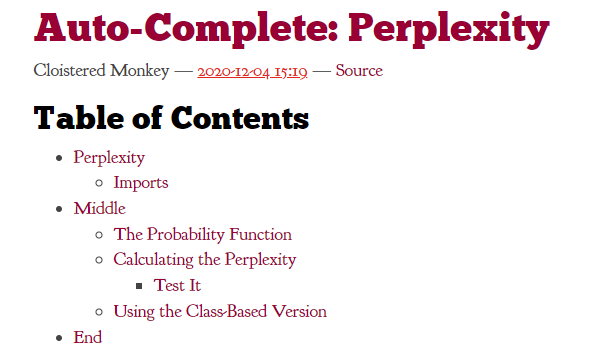

In the previous post we implemented the N-Gram Language Model for the auto-complete system that we began here.

In this section, you will generate the perplexity score to evaluate your model on the test set.

- You will also use back-off when needed.
- Perplexity is used as an evaluation metric of your language model.
- To calculate the the perplexity score of the test set on an n-gram model, use:

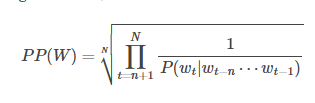

- where N is the length of the sentence.
- n is the number of words in the n-gram (e.g. 2 for a bigram).
- In math, the numbering starts at one and not zero.

In code, array indexing starts at zero, so the code will use ranges for t according to this formula:

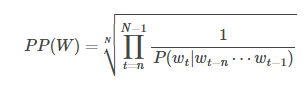

The higher the probabilities are, the lower the perplexity will be.

- The more the n-grams tell us about the sentence, the lower the perplexity score will be.

### Imports

In [ ]:
# python
import math

# pypi
from expects import expect, be_true

import attr

# this project
#from neurotic.nlp.autocomplete import NGrams,NGramProbability

### Middle


##### The Probability Function
This was already defined in the previous post, but the function following it assumes its existence so I'm temporarily re-defining it here.

###### estimate_probability

In [ ]:
# original vrsion
def estimate_probability(word: str,
                         previous_n_gram: tuple, 
                         n_gram_counts: dict,
                         n_plus1_gram_counts: dict,
                         vocabulary_size: int,
                         k: float=1.0) -> float:
    """
    Estimate the probabilities of a next word using the n-gram counts with k-smoothing

    Args:
       word: next word
       previous_n_gram: A sequence of words of length n
       n_gram_counts: Dictionary of counts of n-grams
       n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
       vocabulary_size: number of words in the vocabulary
       k: positive constant, smoothing parameter

    Returns:
       A probability
    """
    previous_n_gram = tuple(previous_n_gram)
    previous_n_gram_count = n_gram_counts.get(previous_n_gram, 0)

    n_plus1_gram = previous_n_gram + (word,)  
    n_plus1_gram_count = n_plus1_gram_counts.get(n_plus1_gram, 0)       
    return (n_plus1_gram_count + k)/(previous_n_gram_count + k * vocabulary_size)

In [ ]:
# modified version
def estimate_probability(word: str,
                         previous_n_gram: tuple, 
                         n_gram_counts: dict,
                         n_plus1_gram_counts: dict,
                         vocabulary_size: int,
                         k: float=1.0) -> float:
    """
    Estimate the probabilities of a next word using the n-gram counts with k-smoothing

    Args:
       word: next word
       previous_n_gram: A tuple of words of length n
       n_gram_counts: Dictionary of counts of n-grams
       n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
       vocabulary_size: number of words in the vocabulary
       k: positive constant, smoothing parameter

    Returns:
       A probability
    """

    if not isinstance(previous_n_gram,tuple):
        raise Exception('previous_n_gram must be a tuple of words of length n')
    
    previous_n_gram_count = n_gram_counts.get(previous_n_gram, 0)
    if previous_n_gram_count==0:
        denominator = previous_n_gram_count + k * vocabulary_size
    else: 
        denominator = previous_n_gram_count

    n_plus1_gram = previous_n_gram + (word,) # orihinal
    n_plus1_gram_count = n_plus1_gram_counts.get(n_plus1_gram, 0)
    if n_plus1_gram_count==0:
        numerator = n_plus1_gram_count + k
    else:
        numerator = n_plus1_gram_count

    # Calculate the probability as the numerator divided by denominator
    probability = numerator/denominator


    return probability

##### Calculating the Perplexity

###### calculate_perplexity

In [ ]:
# UNQ_C10 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: calculate_perplexity
def calculate_perplexity(sentence: list,
                         n_gram_counts: dict,
                         n_plus1_gram_counts: dict,
                         vocabulary_size: int,
                         k: float=1.0):
    """
    Calculate perplexity for a list of sentences

    Args:
       sentence: List of strings
       n_gram_counts: Dictionary of counts of (n+1)-grams
       n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
       vocabulary_size: number of unique words in the vocabulary
       k: Positive smoothing constant

    Returns:
       Perplexity score
    """
    # length of previous words
    n = len(list(n_gram_counts.keys())[0]) 

    # prepend <s> and append <e>
    sentence = ["<s>"] * n + sentence + ["<e>"]

    # Cast the sentence from a list to a tuple
    sentence = tuple(sentence)

    # length of sentence (after adding <s> and <e> tokens)
    N = len(sentence)

    # The variable p will hold the product
    # that is calculated inside the n-root
    # Update this in the code below
    product_pi = 1.0

    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # Index t ranges from n to N - 1, inclusive on both ends
    for t in range(n, N): # complete this line

        # get the n-gram preceding the word at position t
        n_gram = sentence[t - n: t]

        # get the word at position t
        word = sentence[t]

        # Estimate the probability of the word given the n-gram
        # using the n-gram counts, n-plus1-gram counts,
        # vocabulary size, and smoothing constant
        probability = estimate_probability(
            word=word, previous_n_gram=n_gram,
            vocabulary_size=vocabulary_size,
            n_gram_counts=n_gram_counts,
            n_plus1_gram_counts=n_plus1_gram_counts, k=k)

        # Update the product of the probabilities
        # This 'product_pi' is a cumulative product 
        # of the (1/P) factors that are calculated in the loop
        product_pi *= 1/probability

    # Take the Nth root of the product
    perplexity = product_pi**(1/N)

    ### END CODE HERE ### 
    return perplexity

###### Test It

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = NGrams(sentences, 1).counts
bigram_counts = NGrams(sentences, 2).counts


perplexity_train1 = calculate_perplexity(sentences[0],
                                         unigram_counts, bigram_counts,
                                         len(unique_words), k=1.0)
expected = 2.8040
print(f"Perplexity for first train sample: {perplexity_train1:.4f}")

#expect(math.isclose(perplexity_train1, expected, abs_tol=1e-4)).to(be_true)
test_sentence = ['i', 'like', 'a', 'dog']
perplexity_test = calculate_perplexity(test_sentence,
                                       unigram_counts, bigram_counts,
                                       len(unique_words), k=1.0)
print(f"Perplexity for test sample: {perplexity_test:.4f}")
expected = 3.9654
#expect(math.isclose(perplexity_test, expected, abs_tol=1e-4)).to(be_true)

Perplexity for first train sample: 1.1225
Perplexity for test sample: 1.2599


Note: If your sentence is really long, there will be underflow when multiplying many fractions.

- To handle longer sentences, modify your implementation to take the sum of the log of the probabilities.

##### Using the Class-Based Version

In [ ]:
# original version
@attr.s(auto_attribs=True)
class Perplexity:
    """Calculate perplexity

    Args:
     data: the tokenized training input
     n: the size of the n-grams
     augment_vocabulary: whether to augment the vocabulary for toy examples
    """
    data: list
    n: int
    augment_vocabulary: bool=False
    _probabilifier: NGramProbability=None

    @property
    def probabilifier(self) -> NGramProbability:
        """Probability Calculator"""
        if self._probabilifier is None:
            self._probabilifier = NGramProbability(
                self.data, self.n,
                augment_vocabulary=self.augment_vocabulary)
        return self._probabilifier

    def perplexity(self, sentence: list) -> float:
        """Calculates the perplexity for the sentence"""
        sentence = tuple(["<s>"] * self.n + sentence + ["<e>"])
        N = len(sentence)

        n_grams = (sentence[position - self.n: position]
                   for position in range(self.n, N))
        words = (sentence[position]
                 for position in range(self.n, N))
        words_n_grams = zip(words, n_grams)
        probabilities = (self.probabilifier.probability(word, n_gram)
                         for word, n_gram in words_n_grams)
        #product = math.prod((1/probability for probability in probabilities))
        # math.prod in Python >=3.8 # https://stackoverflow.com/questions/69739594/math-prod-is-not-working-in-google-colab-notebook
        from functools import reduce
        import operator
        product = reduce(operator.mul, (1/probability for probability in probabilities))  
        return product**(1/N)

In [ ]:
!python -V

Python 3.7.13


###### Test It

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]

model = Perplexity(sentences, 1, augment_vocabulary=False)

actual = model.perplexity(sentences[0])

expected = 2.8040
print(f"Perplexity for first train sample: {actual:.4f}")

expect(math.isclose(actual, expected, abs_tol=1e-4)).to(be_true)
test_sentence = ['i', 'like', 'a', 'dog']
model
perplexity_test = model.perplexity(test_sentence)

print(f"Perplexity for test sample: {perplexity_test:.4f}")
expected = 3.9654
expect(math.isclose(perplexity_test, expected, abs_tol=1e-4)).to(be_true)

Perplexity for first train sample: 2.8040
Perplexity for test sample: 3.9654


### End
In the next part we'll build our [completed auto-complete system](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete-building-the-auto-complete-system/).

### LM Corpus Perplexity - my addition

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
                 ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))
print("num unique_words:", len(unique_words), unique_words)
print("vocabulary",  len(unique_words + ["<s>", "<e>", "<unk>"]), unique_words + ["<s>", "<e>", "<unk>"])

uni_grams = NGrams(sentences, 1)
bi_grams = NGrams(sentences, 2)
tri_grams = NGrams(sentences, 3)
def calculate_perplexity_corpus(lines,
                                unigram_counts, bigram_counts,
                                       unique_words_cnt, k=1.0):
    perplexity_total = 1
    for i, line in enumerate(sentences):
        perplexity_line = calculate_perplexity(line,
                                          unigram_counts, bigram_counts,
                                          unique_words_cnt, k=1.0)
        if i<2: print(perplexity_line)
        perplexity_total *= perplexity_line
    return perplexity_total
perplexity_total = calculate_perplexity_corpus(sentences,unigram_counts, bigram_counts, len(unique_words), k=1.0)        
print(f"perplexity_total={perplexity_total:.3f}")

num unique_words: 7 ['i', 'like', 'cat', 'is', 'a', 'dog', 'this']
vocabulary 10 ['i', 'like', 'cat', 'is', 'a', 'dog', 'this', '<s>', '<e>', '<unk>']
1.2009369551760027
1.147202690439877
perplexity_total=1.378


## **Build the Auto-Complete System**
In the previous post we tested the perplexity of our N-Gram Language model. In this, the final post in the series that we began with this post, we'll implement the final system.

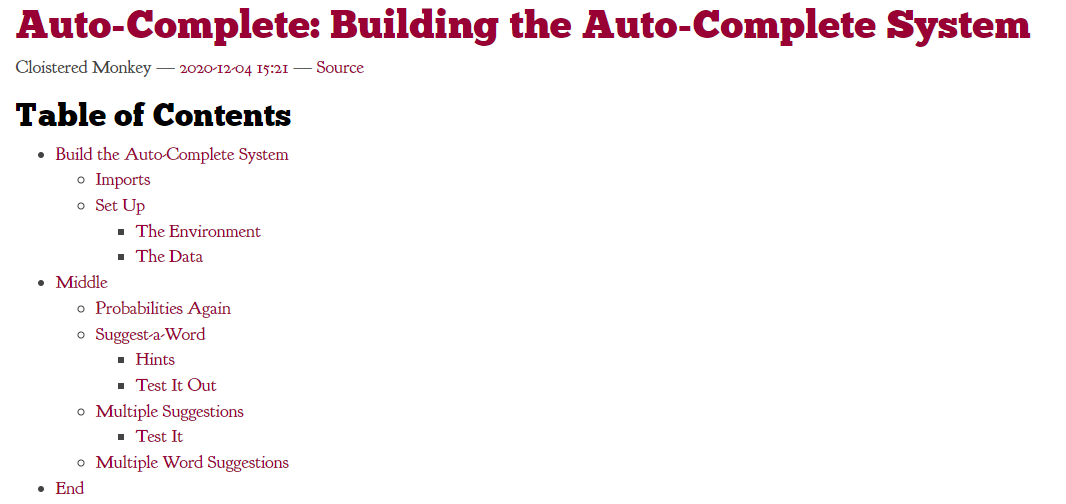

### Imports

In [ ]:
# python
from itertools import chain
import math
import os

# pypi
from dotenv import load_dotenv
from expects import be_true, equal, expect
# this project
#from neurotic.nlp.autocomplete import NGrams, Tokenizer, TrainTestSplit

###Set Up


####The Environment


In [ ]:
load_dotenv("posts/nlp/.env", override=True)

True

####The Data


In [ ]:
#path = os.environ["TWITTER_AUTOCOMPLETE"]
#with open(path) as reader:
#    data = reader.read()

In [ ]:
#2017_01_28 - Trump Tweets.xlsx
import pandas as pd
df = pd.read_excel('https://query.data.world/s/yotwqdi4kem35hmz7cxzz7ih4fcxzt')

In [ ]:
df.head(5)

,Date,Time,Tweet,Client,Client Simplified
0,01/27/2017,6:46:22 PM,I promise that our administration will ALWAYS...,Twitter for iPhone,Twitter for iPhone
1,01/27/2017,5:00:47 PM,Congratulations Secretary Mattis! https://t.c...,Twitter for iPhone,Twitter for iPhone
2,01/27/2017,3:20:15 PM,Statement on International Holocaust Remembra...,Twitter for iPhone,Twitter for iPhone
3,01/27/2017,11:30:29 AM,.@VP Mike Pence will be speaking at today's #...,Twitter for iPhone,Twitter for iPhone
4,01/27/2017,11:27:02 AM,The #MarchForLife is so important. To all of ...,Twitter for iPhone,Twitter for iPhone


###Suggest-a-Word


In [ ]:
data = '\n'.join(df["Tweet"].values)
print(data[:400])

 I promise that our administration will ALWAYS have your back. We will ALWAYS be with you! https://t.co/D0aOWhOH4X
 Congratulations Secretary Mattis! https://t.co/mkuhbegzqS
 Statement on International Holocaust Remembrance Day: https://t.co/KjU0MOxCHk
 .@VP Mike Pence will be speaking at today's #MarchForLife -- You have our full support! https://t.co/1jb53SEGV4
 The #MarchForLife is so important


####Compute probabilities for all possible next words and suggest the most likely one.

- This function also take an optional argument `start_with`, which specifies the first few letters of the next words.


####Hints
- estimate_probabilities returns a dictionary where the key is a word and the value is the word's probability.
- Use str1.startswith(str2) to determine if a string starts with the letters of another string. For example, 'learning'.startswith('lea') returns True, whereas 'learning'.startswith('ear') returns False. There are two additional parameters in str.startswith(), but you can use the default values for those parameters in this case.

In [ ]:
# UNQ_C11 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: suggest_a_word
def suggest_a_word(previous_tokens, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0, start_with=None):
    """
    Get suggestion for the next word

    Args:
       previous_tokens: The sentence you input where each token is a word. Must have length > n 
       n_gram_counts: Dictionary of counts of (n+1)-grams
       n_plus1_gram_counts: Dictionary of counts of (n+1)-grams
       vocabulary: List of words
       k: positive constant, smoothing parameter
       start_with: If not None, specifies the first few letters of the next word

    Returns:
       A tuple of 
         - string of the most likely next word
         - corresponding probability
    """

    # length of previous words
    n = len(list(n_gram_counts.keys())[0]) 

    # From the words that the user already typed
    # get the most recent 'n' words as the previous n-gram
    previous_n_gram = previous_tokens[-n:]

    # Estimate the probabilities that each word in the vocabulary
    # is the next word,
    # given the previous n-gram, the dictionary of n-gram counts,
    # the dictionary of n plus 1 gram counts, and the smoothing constant
    probabilities = estimate_probabilities(previous_n_gram,
                                           n_gram_counts, n_plus1_gram_counts,
                                           vocabulary, k=k)

    # Initialize suggested word to None
    # This will be set to the word with highest probability
    suggestion = None

    # Initialize the highest word probability to 0
    # this will be set to the highest probability 
    # of all words to be suggested
    max_prob = 0

    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # For each word and its probability in the probabilities dictionary:
    for word, prob in probabilities.items(): # complete this line

        # If the optional start_with string is set
        if start_with is not None: # complete this line

            # Check if the beginning of word does not match with the letters in 'start_with'
            if not word.startswith(start_with): # complete this line

                # if they don't match, skip this word (move onto the next word)
                continue # complete this line

        # Check if this word's probability
        # is greater than the current maximum probability
        if prob > max_prob: # complete this line

            # If so, save this word as the best suggestion (so far)
            suggestion = word

            # Save the new maximum probability
            max_prob = prob

    ### END CODE HERE

    return suggestion, max_prob

#### Test It Out

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = NGrams(sentences, 1).counts
bigram_counts = NGrams(sentences, 2).counts

previous_tokens = ["i", "like"]
word, probability = suggest_a_word(previous_tokens, unigram_counts, bigram_counts, unique_words, k=1.0)
print(f"The previous words are 'i like',\n\tand the suggested word is `{word}` with a probability of {probability:.4f}")
expected_word, expected_probability = "a", 0.2727
expect(word).to(equal(expected_word))
expect(math.isclose(probability, expected_probability, abs_tol=1e-4)).to(be_true)
print()

# test your code when setting the starts_with
tmp_starts_with = 'c'
word, probability = suggest_a_word(previous_tokens, unigram_counts, bigram_counts, unique_words, k=1.0, start_with=tmp_starts_with)
print(f"The previous words are 'i like', the suggestion must start with `{tmp_starts_with}`\n\tand the suggested word is `{word}` with a probability of {probability:.4f}")

expected_word, expected_probability = "cat", 0.0909
expect(word).to(equal(expected_word))
expect(math.isclose(probability, expected_probability, abs_tol=1e-4)).to(be_true)

The previous words are 'i like',
	and the suggested word is `a` with a probability of 0.2727

The previous words are 'i like', the suggestion must start with `c`
	and the suggested word is `cat` with a probability of 0.0909


####Multiple Suggestions
The function defined below loops over various n-gram models to get multiple suggestions.

In [ ]:
def get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0, start_with=None):
    model_counts = len(n_gram_counts_list)
    suggestions = []
    for i in range(model_counts-1):
        n_gram_counts = n_gram_counts_list[i]
        n_plus1_gram_counts = n_gram_counts_list[i+1]

        suggestion = suggest_a_word(previous_tokens, n_gram_counts,
                                    n_plus1_gram_counts, vocabulary,
                                    k=k, start_with=start_with)
        suggestions.append(suggestion)
    return suggestions

##### Test It

In [ ]:
sentences = [['i', 'like', 'a', 'cat'],
             ['this', 'dog', 'is', 'like', 'a', 'cat']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = NGrams(sentences, 1).counts
bigram_counts = NGrams(sentences, 2).counts
trigram_counts = NGrams(sentences, 3).counts
quadgram_counts = NGrams(sentences, 4).counts
qintgram_counts = NGrams(sentences, 5).counts

n_gram_counts_list = [unigram_counts, bigram_counts, trigram_counts, quadgram_counts, qintgram_counts]
previous_tokens = ["i", "like"]
tmp_suggest3 = get_suggestions(previous_tokens, n_gram_counts_list, unique_words, k=1.0)

print(f"The previous words are 'i like', the suggestions are:")
display(tmp_suggest3)

The previous words are 'i like', the suggestions are:


[('a', 0.2727272727272727),
 ('a', 0.2),
 ('is', 0.1111111111111111),
 ('is', 0.1111111111111111)]

###Multiple Word Suggestions

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenizer = Tokenizer(data)
splitter = TrainTestSplit(tokenizer.tokenized)
train_data_processed = splitter.training

In [ ]:
n_gram_counts_list = [NGrams(train_data_processed, n).counts for n in range(1, 6)]

In [ ]:
vocabulary = list(set(chain.from_iterable(train_data_processed)))
previous_tokens = ["i", "am", "to"]
tmp_suggest4 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest4)

The previous words are ['i', 'am', 'to'], the suggestions are:


[('be', 0.012798728953814242),
 ('2', 0.00010912563088255354),
 ('be', 5.456728145803776e-05),
 ('thepgaofamerica', 2.728512960436562e-05)]

In [ ]:
previous_tokens = ["i", "want", "to", "go"]
tmp_suggest5 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest5)

The previous words are ['i', 'want', 'to', 'go'], the suggestions are:


[('to', 0.002152678739606598),
 ('to', 0.00046253469010175765),
 ('to', 0.0001363995962571951),
 ('to', 0.00010913158540910704)]

In [ ]:
previous_tokens = ["hey", "how", "are"]
tmp_suggest6 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest6)

The previous words are ['hey', 'how', 'are'], the suggestions are:


[('the', 0.0044444444444444444),
 ('the', 8.184199039720646e-05),
 ('thepgaofamerica', 2.728512960436562e-05),
 ('thepgaofamerica', 2.728512960436562e-05)]

In [ ]:
previous_tokens = ["hey", "how", "are", "you"]
tmp_suggest7 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0)

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest7)

The previous words are ['hey', 'how', 'are', 'you'], the suggestions are:


[('.', 0.012013677109324461),
 ('going', 0.00027227924959838813),
 ('a', 5.456728145803776e-05),
 ('thepgaofamerica', 2.728512960436562e-05)]

In [ ]:
previous_tokens = ["hey", "how", "are", "you"]
tmp_suggest8 = get_suggestions(previous_tokens, n_gram_counts_list, vocabulary, k=1.0, start_with="d")

print(f"The previous words are {previous_tokens}, the suggestions are:")
display(tmp_suggest8)

The previous words are ['hey', 'how', 'are', 'you'], the suggestions are:


[('do', 0.003419277331115424),
 ('doing', 5.445584991967762e-05),
 ('damicoj03', 2.728364072901888e-05),
 ('damicoj03', 2.728512960436562e-05)]

##End
So, now we have our system. Here are all the prior posts in this series.

- [Overview](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete/)
- [Pre-Processing I](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete-pre-process-the-data-i/)
- [Pre-Processing II](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete-pre-process-the-data-ii/)
- [The N-Gram Model](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete-the-n-gram-model/)
- [Perplexity](https://necromuralist.github.io/Neurotic-Networking/posts/nlp/auto-complete-perplexity/)